<a href="https://colab.research.google.com/github/Jaswanth1177/Chennai-House-Price-Prediction-Project/blob/main/ChennaiHousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the csv to a Pandas DataFrame

In [2]:
df = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Checking For Outliers if present in the data

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


From the Above, we can see that there are no outliers present in the data. So we check for Datatypes of the data

In [6]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

Checing for NULL Values in Data

In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

As we can see there are some null values in the data, so we remove or impute them below. We also check if there are ambiguous data(spell mistakes) in the data.

# **DATA ANALYSIS**

AREA

In [8]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

As we can see there are spelling mistakes in the data. so we replace them.

In [9]:
#Chrompet Replacing
df['AREA']= df['AREA'].replace(['Chrompt'],'Chrompet')
df['AREA']= df['AREA'].replace(['Chrmpet'],'Chrompet')
df['AREA']= df['AREA'].replace(['Chormpet'],'Chrompet')
#Karapakkam 
df['AREA']= df['AREA'].replace(['Karapakam'],'Karapakkam')
#KK Nagar
df['AREA']= df['AREA'].replace(['KKNagar'],'KK Nagar')
#Velachery
df['AREA']= df['AREA'].replace(['Velchery'],'Velachery')
#Anna Nagar
df['AREA']= df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')

#Adyar
df['AREA']= df['AREA'].replace(['Adyr'],'Adyar')
#T Nagar
df['AREA']= df['AREA'].replace(['TNagar'],'T Nagar')

In [10]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [11]:
ar = df['AREA'].unique()

In [12]:
ar

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

MZZONE

In [13]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

BUILDTYPE

In [14]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [15]:
df['BUILDTYPE']= df['BUILDTYPE'].replace(['Other'],'Others')
df['BUILDTYPE']= df['BUILDTYPE'].replace(['Comercial'],'Commercial')

In [16]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

STREET

In [17]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [18]:
df['STREET']= df['STREET'].replace(['Pavd'],'Paved')
df['STREET']= df['STREET'].replace(['NoAccess'],'No Access')


In [19]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

PARK_FACILITY

In [20]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [21]:
df['PARK_FACIL']= df['PARK_FACIL'].replace(['Noo'],'No')

In [22]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

N_ROOM

In [23]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

SALE_COND

In [24]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [25]:
df['SALE_COND']= df['SALE_COND'].replace(['Adj Land'],'AdjLand')
df['SALE_COND']= df['SALE_COND'].replace(['Ab Normal'],'AbNormal')
df['SALE_COND']= df['SALE_COND'].replace(['Partiall'],'Partial')
df['SALE_COND']= df['SALE_COND'].replace(['PartiaLl'],'Partial')

In [26]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

UTILITY_AVAIL

In [27]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [28]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub')
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].replace(['NoSewr '],'NoSewr')

In [29]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

N_BEDROOM

In [30]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [31]:
df['N_BEDROOM'].isnull().sum()

1

As we can see there is only one null value in the data so we impute it by calculating the mode of the data.

In [32]:
nu = df['N_BEDROOM'].mode()
df.N_BEDROOM.fillna(int(nu), inplace=True)

In [33]:
df['N_BEDROOM'].isnull().sum()

0

In [34]:
df['N_BEDROOM'].value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [35]:
df['N_BEDROOM'].dtypes

dtype('float64')

If we check for the DataType of the data we see that it is a Float. So we convert it to INT

In [36]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int')

In [37]:
df['N_BEDROOM'].dtypes

dtype('int64')

N_BATHROOM

In [38]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [39]:
df['N_BATHROOM'].isnull().sum()

5

As we can see there is only 5 null values in the data so we impute them by calculating the mode of the data.

In [40]:
nb= df['N_BATHROOM'].mode()
df.N_BATHROOM.fillna(int(nb), inplace=True)

In [41]:
df['N_BATHROOM'].isnull().sum()

0

In [42]:
df['N_BATHROOM'].dtypes

dtype('float64')

If we check for the DataType of the data we see that it is a Float. So we convert it to INT

In [43]:
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int')

In [44]:
df['N_BATHROOM'].dtypes

dtype('int64')

In [45]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Converting to DateTime format and extractng Year to calculate age of the house

In [46]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [47]:
df["SALE_YEAR"] = pd.DatetimeIndex(df["DATE_SALE"]).year

In [48]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)

In [49]:
df["BUILD_YEAR"] = pd.DatetimeIndex(df["DATE_BUILD"]).year

In [50]:
df["HOUSE_AGE"] = df["SALE_YEAR"] - df["BUILD_YEAR"]

In [51]:
df["HOUSE_AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSE_AGE, Length: 7109, dtype: int64

As we know unique values cannot be used as a feature so we remove PRT_ID and we remove COMMIS and REG_fee because they cannot be used to predict SALES_PRICE as they are some percent of sales_price.

In [52]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR', 'HOUSE_AGE'],
      dtype='object')

In [53]:
df.drop('PRT_ID', inplace=True, axis=1)
df.drop('COMMIS', inplace=True, axis=1)
df.drop('REG_FEE', inplace=True, axis=1)

In [54]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'SALE_YEAR',
       'BUILD_YEAR', 'HOUSE_AGE'],
      dtype='object')

# Feature Distribution Plots

AREA

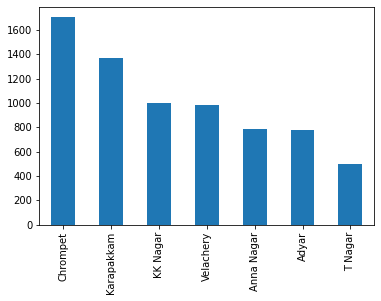

In [55]:
df['AREA'].value_counts().plot(kind='bar')

INT_SQFT

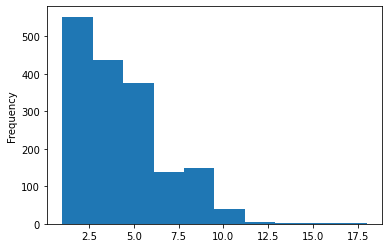

In [56]:
df['INT_SQFT'].value_counts().plot(kind='hist')

DIST_MAINROAD

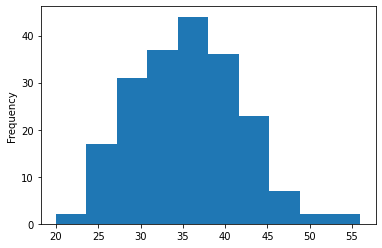

In [57]:
df['DIST_MAINROAD'].value_counts().plot(kind='hist')

N_BEDROOM

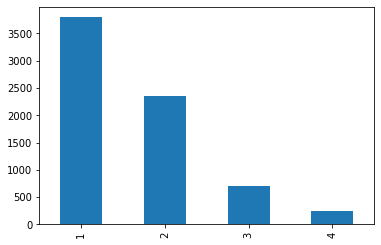

In [58]:
df['N_BEDROOM'].value_counts().plot(kind='bar')

N_BATHROOM

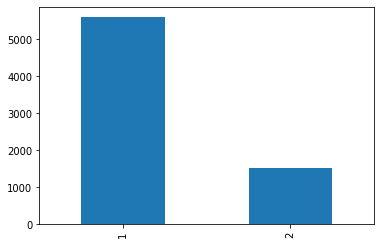

In [59]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

N_ROOM

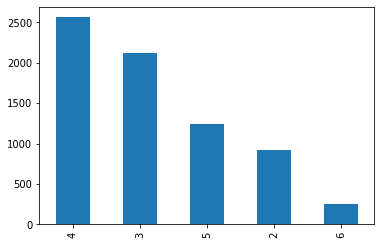

In [60]:
df['N_ROOM'].value_counts().plot(kind='bar')

BUILDTYPE

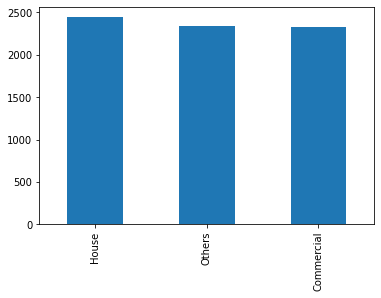

In [61]:
df['BUILDTYPE'].value_counts().plot(kind='bar')

MZZONE

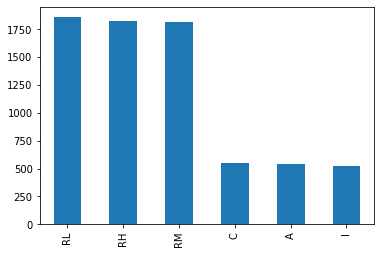

In [62]:
df['MZZONE'].value_counts().plot(kind='bar')

PARK_FACIL

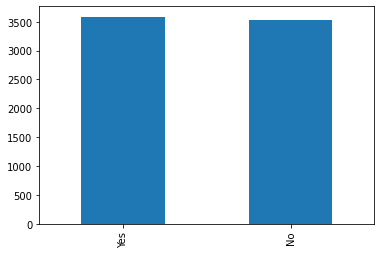

In [63]:
df['PARK_FACIL'].value_counts().plot(kind='bar')

SALE_COND

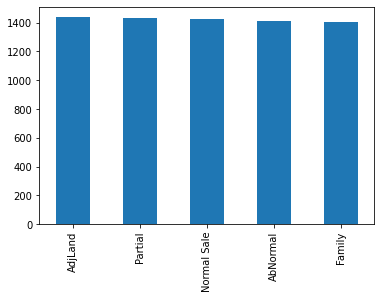

In [64]:
df['SALE_COND'].value_counts().plot(kind='bar')

STREET

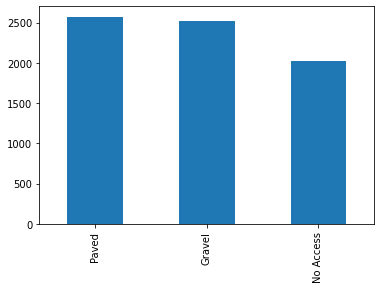

In [65]:
df['STREET'].value_counts().plot(kind='bar')

UTILITY_AVAIL

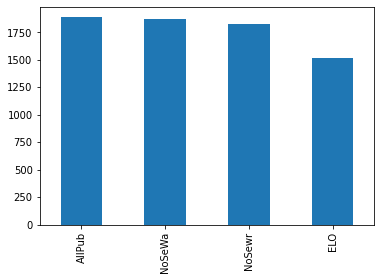

In [66]:
df['UTILITY_AVAIL'].value_counts().plot(kind='bar')

HOUSE_AGE

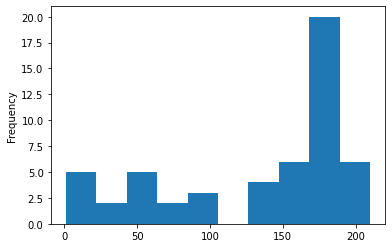

In [67]:
df['HOUSE_AGE'].value_counts().plot(kind='hist')

# Feature Vs Target Plots

AREA vs SALES_PRICE

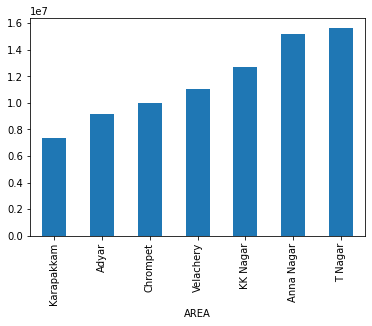

In [68]:
df.groupby("AREA")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

SALE_COND vs SALES_PRICE

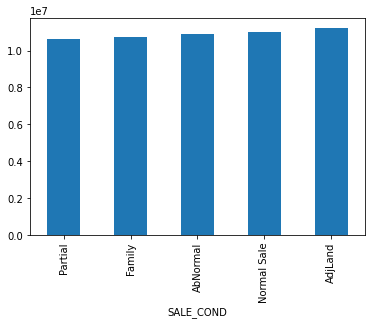

In [69]:
df.groupby("SALE_COND")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

N_BEDROOM vs SALES_PRICE

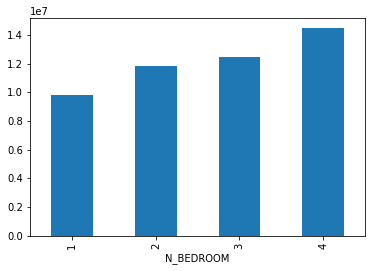

In [70]:
df.groupby("N_BEDROOM")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

N_BATHROOM vs SALES_PRICE

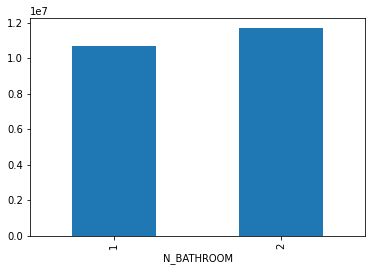

In [71]:
df.groupby("N_BATHROOM")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

N_ROOM vs SALES_PRICE

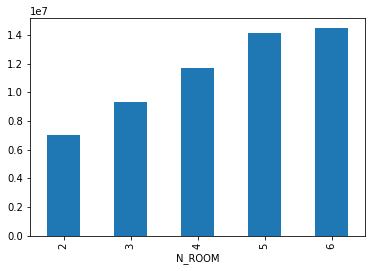

In [72]:
df.groupby("N_ROOM")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

PARK_FACIL vs SALES_PRICE

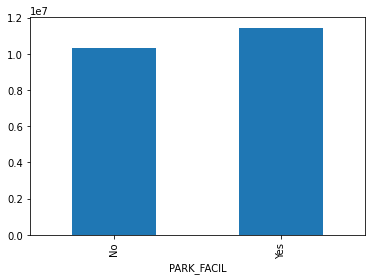

In [73]:
df.groupby("PARK_FACIL")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

BUILDTYPE vs SALES_PRICE

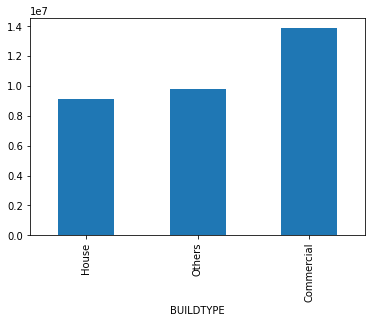

In [74]:
df.groupby("BUILDTYPE")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

As we can see there is a relationship between the feature and target but it is not a perfect linear relationship

UTILITY_AVAIL vs SALES_PRICE

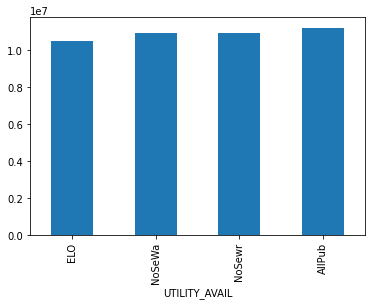

In [75]:
df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is no linear relationship

STREET vs SALES_PRICE

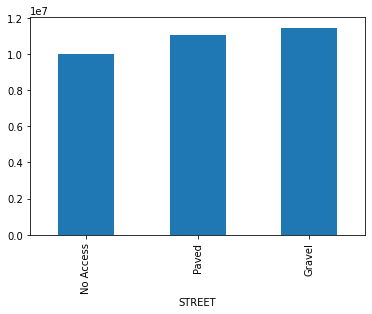

In [76]:
df.groupby("STREET")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

MZZONE vs SALES_PRICE

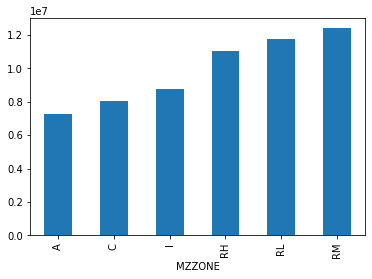

In [77]:
df.groupby("MZZONE")["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

AS we can see from the above figure, there is a linear relationship between the feature and target

INT_SQFT vs SALES_PRICE

Text(0.5, 1.0, 'INT_SQFT vs SALES_PRICE')

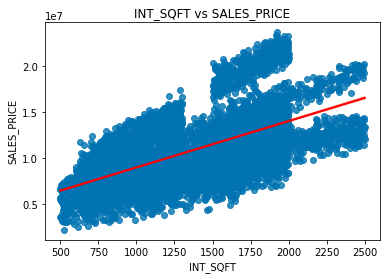

In [78]:
sns.set_palette("colorblind")
sns.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")

From the above figure we can clearly see that if INT_SQFT increases, SALES_PRICE also increases.

DIST_MAINROAD vs SALES_PRICE

Text(0.5, 1.0, 'DIST_MAINROAD vs SALES_PRICE')

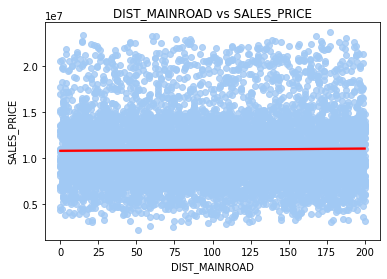

In [79]:
sns.set_palette("pastel")
sns.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

From the above figure, we can see that DIST_MAINROAD has no impact on SALES_PRICE

HOUSE_AGE vs SALES_PRICE

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

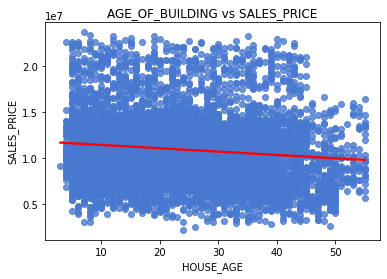

In [80]:
sns.set_palette("muted")
sns.regplot(x = df["HOUSE_AGE"], y =df["SALES_PRICE"], line_kws={"color":"red"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

From the above figure, we can see that there is a relationship but not a positive relationship. As BUILDING_AGE increases SALES_PRICE decreases

In [81]:
df.shape

(7109, 22)

# **ENCODING**

1. From the above plots there are mixed data. So we use different encoding techniques
2. For AREA, SALE_COND, PARK_FACIL, STREET, MZZONE has ordinal linear relationship with target so we use ONEHOT ENCODING.
3. For BUILD_TYPE there is a ordinal relationship with target but not perfectly linear so we use LABEL ENCODING.
4. For UTILITY_AVAIL there is no linear relationship so we use LABEL ENCODING.

# LABEL ENCODING

BUILD_TYPE

In [82]:
df = pd.get_dummies(df, columns=["BUILDTYPE"])

UTILITY_AVAIL

In [83]:
df = pd.get_dummies(df, columns=["UTILITY_AVAIL"])


In [84]:
df1=df

In [85]:
df1.to_csv("final_cleaned_data1")

# ONE-HOT ENCODING

AREA

In [86]:
area = {"Karapakkam":0, "Adyar":1, "Chrompet":2, "Velachery":3, "KK Nagar":4, "Anna Nagar":5, "T Nagar":6}

df["AREA"] = df["AREA"].replace(area)

df["AREA"].unique()

array([0, 5, 1, 3, 2, 4, 6])

SALE_COND

In [87]:
salecond = {"Partial":0, "Family":1, "AbNormal":2, "Normal Sale":3, "AdjLand":4}

df["SALE_COND"] = df["SALE_COND"].replace(salecond)

df["SALE_COND"].unique()

array([2, 1, 0, 4, 3])

PARK_FACIL

In [88]:
park = {"Yes":1, "No":0}

df["PARK_FACIL"] = df["PARK_FACIL"].replace(park)

df["PARK_FACIL"].unique()

array([1, 0])

STREET

In [89]:
street = {"No Access":0, "Paved":1, "Gravel":2}

df["STREET"] = df['STREET'].replace(street)

df['STREET'].unique()

array([1, 2, 0])

MZZONE

In [90]:
zone = {"A":0, "C":1, "I":2, "RH":3, "RL":4, "RM":5}

df["MZZONE"] = df["MZZONE"].replace(zone)

df["MZZONE"].unique()

array([0, 3, 4, 2, 1, 5])

REMOVING UNWANTED DATA:
1. As there is no need of SALE_YEAR and BUILD_YEAR we drop it.
2. As we dont know how QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL are calculated so we consider them as unwanted data and hence we remove them.
3. DATE_SALE and DATE_BUILD cannot be used as a feature because they are timestamp data, so we remove them.

In [91]:
df.drop('DATE_SALE', inplace=True, axis=1)
df.drop('DATE_BUILD', inplace=True, axis=1)
df.drop('QS_ROOMS', inplace=True, axis=1)
df.drop('QS_BATHROOM', inplace=True, axis=1)
df.drop('QS_BEDROOM', inplace=True, axis=1)
df.drop('QS_OVERALL', inplace=True, axis=1)
df.drop('SALE_YEAR', inplace=True, axis=1)
df.drop('BUILD_YEAR', inplace=True, axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DIST_MAINROAD         7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   STREET                7109 non-null   int64
 9   MZZONE                7109 non-null   int64
 10  SALES_PRICE           7109 non-null   int64
 11  HOUSE_AGE             7109 non-null   int64
 12  BUILDTYPE_Commercial  7109 non-null   uint8
 13  BUILDTYPE_House       7109 non-null   uint8
 14  BUILDTYPE_Others      7109 non-null   uint8
 15  UTILITY_AVAIL_AllPub  7109 non-null   uint8
 16  UTILIT

# **SPLITTING THE DATA**

In [93]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

# **MACHINE LEARNING MODELS**

**1. LINEAR REGRESSION**

In [95]:
#importing all the required functions
from sklearn.linear_model import LinearRegression

In [96]:
#Building the Model
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [97]:
#FINAL PREDICTIONS:
y_pred = linReg.predict(x_test)
y_pred

array([11004355.34306848, 14436661.74120433, 14703112.95527572, ...,
        6612893.87279093,  8732360.06495974, 15691866.46404587])

In [98]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
6107,9866820,1.100436e+07
6964,14238410,1.443666e+07
6580,13547020,1.470311e+07
1036,14048900,1.431157e+07
1469,7439700,6.200253e+06
...,...,...
6279,12181500,1.197445e+07
6190,13491940,1.379635e+07
1828,6408750,6.612894e+06
5125,9387600,8.732360e+06


In [99]:
from sklearn import metrics
linreg1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((linreg1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.94 %


**2. KNN REGRESSION**

As scaling is mandatory for this model so we scale the data.

In [100]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.9293577072580912
K value  :  2  score :  0.9293577072580912
K value  :  3  score :  0.9293577072580912
K value  :  4  score :  0.9293577072580912
K value  :  5  score :  0.9293577072580912
K value  :  6  score :  0.9293577072580912
K value  :  7  score :  0.9293577072580912
K value  :  8  score :  0.9293577072580912
K value  :  9  score :  0.9293577072580912
K value  :  10  score :  0.9293577072580912
K value  :  20  score :  0.9293577072580912
K value  :  40  score :  0.9293577072580912
K value  :  50  score :  0.9293577072580912
K value  :  80  score :  0.9293577072580912
K value  :  100  score :  0.9293577072580912


In [102]:
from sklearn.neighbors import KNeighborsRegressor
KNNR=KNeighborsRegressor()
KNNR.fit(X_train,y_train)

KNeighborsRegressor()

In [103]:
y_pred_KNNR = KNNR.predict(X_test)
y_pred_KNNR

array([10887058., 12641928., 13475416., ...,  7370519.,  9760746.,
       14058416.])

In [104]:
result_KNNR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNNR})
result_KNNR

,Actual,Predicted
6107,9866820,10887058.0
6964,14238410,12641928.0
6580,13547020,13475416.0
1036,14048900,12592028.0
1469,7439700,7897869.0
...,...,...
6279,12181500,11277723.0
6190,13491940,12341484.0
1828,6408750,7370519.0
5125,9387600,9760746.0


In [105]:
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNNR)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 91.77 %


**3. DECISION TREE**

As scaling is mandatory for this model so we scale the data.

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  Dtree = DecisionTreeRegressor(max_depth=depth)
  Dtree.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(Dtree, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.3591784817466277
DEPTH:  2 R2-Score:  0.6780398901388676
DEPTH:  3 R2-Score:  0.8015433917088064
DEPTH:  4 R2-Score:  0.8812866006848982
DEPTH:  5 R2-Score:  0.9146476729739312
DEPTH:  6 R2-Score:  0.9349215555560713
DEPTH:  7 R2-Score:  0.9490330989443143
DEPTH:  8 R2-Score:  0.959000211278809
DEPTH:  9 R2-Score:  0.9649492615735269
DEPTH:  10 R2-Score:  0.9678932384169269
DEPTH:  20 R2-Score:  0.9679491317749394
DEPTH:  30 R2-Score:  0.9687453289117831
DEPTH:  40 R2-Score:  0.9684633172574394
DEPTH:  50 R2-Score:  0.9686182754945722
DEPTH:  60 R2-Score:  0.9679674179047261
DEPTH:  100 R2-Score:  0.9682653029590451


In [109]:
dtree = DecisionTreeRegressor(max_depth=30)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [110]:
y_pred_dt = dtree.predict(x_test)
y_pred_dt

array([ 9980320., 14054970., 13457270., ...,  6996125.,  9637220.,
       14702890.])

In [111]:
result_DT=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
result_DT

,Actual,Predicted
6107,9866820,9980320.0
6964,14238410,14054970.0
6580,13547020,13457270.0
1036,14048900,14246650.0
1469,7439700,7375050.0
...,...,...
6279,12181500,13308950.0
6190,13491940,13584980.0
1828,6408750,6996125.0
5125,9387600,9637220.0


In [112]:
from sklearn import metrics
dtree1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dtree1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 97.32 %


**4. RANDOM FOREST MODEL**

Scaling is not required for this model.

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Randomforest = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
Randomforest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [115]:
y_pred_rf = Randomforest.predict(x_test)

In [116]:
result_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_RF

,Actual,Predicted
6107,9866820,9.968295e+06
6964,14238410,1.355000e+07
6580,13547020,1.286825e+07
1036,14048900,1.307950e+07
1469,7439700,7.519896e+06
...,...,...
6279,12181500,1.230758e+07
6190,13491940,1.275135e+07
1828,6408750,7.047111e+06
5125,9387600,9.630694e+06


In [117]:
from sklearn import metrics
RF1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((RF1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 97.56 %


**5. XGBOOST MODEL**

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [119]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xg = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xg.fit(x_train,y_train) #train the model
  xg.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", xg.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(xg, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.38724545587620995  Cross-Val score :  -0.39214690138142516
Learning rate :  0.02  Train score :  0.7448468440110441  Cross-Val score :  0.7409867309758899
Learning rate :  0.03  Train score :  0.9239519083764871  Cross-Val score :  0.9212042466605807
Learning rate :  0.04  Train score :  0.9618996668836912  Cross-Val score :  0.959251879701063
Learning rate :  0.05  Train score :  0.9744879704487971  Cross-Val score :  0.9720436513063107
Learning rate :  0.1  Train score :  0.9919188459559566  Cross-Val score :  0.990310200161854
Learning rate :  0.11  Train score :  0.9935516368981286  Cross-Val score :  0.9918605543946197
Learning rate :  0.12  Train score :  0.9943343212880316  Cross-Val score :  0.9924311752016239
Learning rate :  0.13  Train score :  0.9947697039846144  Cross-Val score :  0.9932395357555672
Learning rate :  0.14  Train score :  0.9954611817328165  Cross-Val score :  0.9938125968853612
Learning rate :  0.15  Train score :  0

In [120]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test) # scoring the model - r2 squared

0.9969233388827347

In [121]:
XG_pred= xg.predict(x_test)

In [122]:
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

,Actual,Predicted
6107,9866820,9548610.0
6964,14238410,14365836.0
6580,13547020,13466778.0
1036,14048900,14201730.0
1469,7439700,7328083.5
...,...,...
6279,12181500,12146346.0
6190,13491940,13708898.0
1828,6408750,6425138.5
5125,9387600,9759426.0


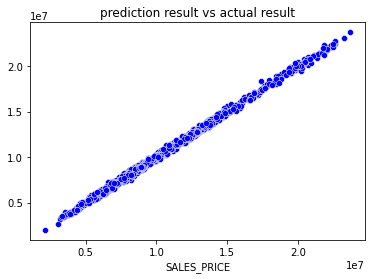

In [123]:
sns.scatterplot(x= y_test, y=XG_pred, color=["blue"])
plt.title("prediction result vs actual result")
plt.show()

In [124]:
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 99.72 %


<Figure size 720x720 with 0 Axes>

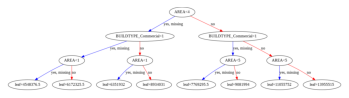

In [125]:
from xgboost import plot_tree
plt.figure(figsize=(10,10))
plot_tree(xg_model)

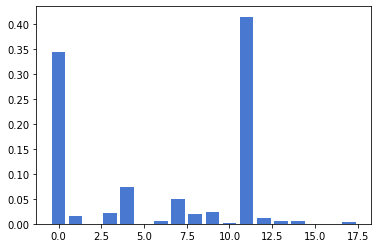

In [126]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()


**FINDING BEST MODEL**

In [127]:
print("R2 SCORE FOR ALL MODELS:")
print()
print('R2- SCORE FOR LINEAR REGRESSION:', round((linreg1*100),2),"%")
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")
print('R2- SCORE FOR DECISION TREE MODEL:', round((dtree1*100),2),"%")
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((RF1*100),2),"%")
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2 SCORE FOR ALL MODELS:

R2- SCORE FOR LINEAR REGRESSION: 92.94 %
R2- SCORE FOR KNN MODEL: 91.77 %
R2- SCORE FOR DECISION TREE MODEL: 97.32 %
R2- SCORE FOR RANDOM FOREST MODEL : 97.56 %
R2- SCORE FOR XG-BOOST MODEL: 99.72 %


In [142]:
r2={'R2_score':['LR', 'KNN', 'DT', 'RF',"XG"],
        'score':[92.94, 91.77, 97.32, 97.56,99.72]}
R2_df=pd.DataFrame(r2)
R2_df

,R2_score,score
0,LR,92.94
1,KNN,91.77
2,DT,97.32
3,RF,97.56
4,XG,99.72


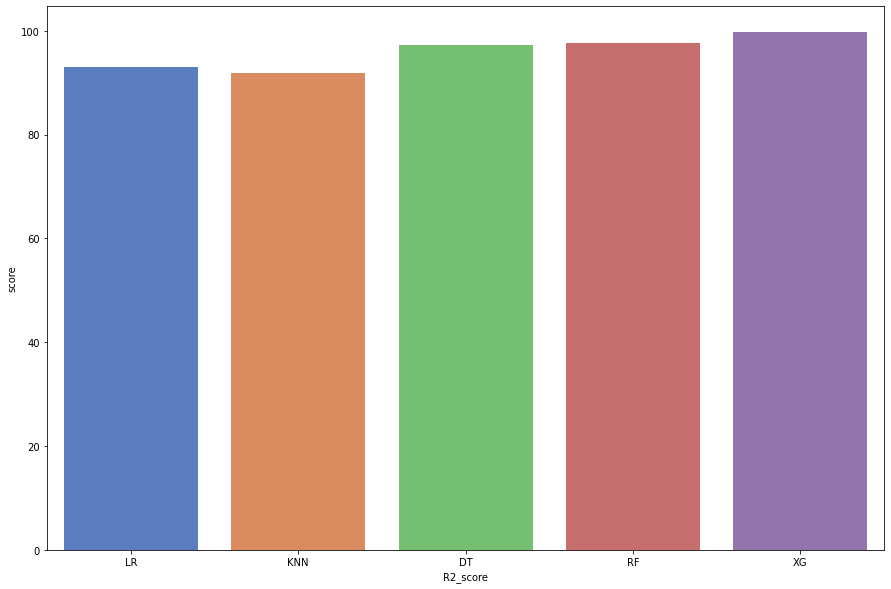

In [143]:
plt.figure(figsize=(15,10))
sns.barplot(x=R2_df.R2_score,y=R2_df.score)

**FEATURE IMPORTANCE**

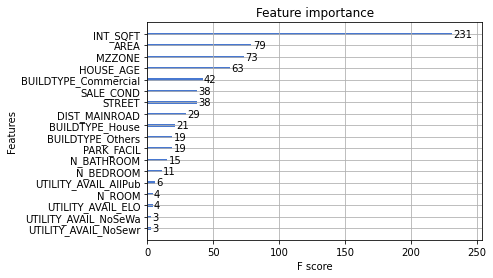

In [130]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xg)
plt.show()

In [131]:
print(xg.feature_importances_)

[3.45353752e-01 1.58660840e-02 1.17117284e-04 2.17026360e-02
 7.38707259e-02 5.47269941e-04 5.28035639e-03 4.96986732e-02
 1.98160764e-02 2.38950811e-02 2.27486854e-03 4.15296048e-01
 1.10704843e-02 5.20112505e-03 5.17301075e-03 5.46233437e-04
 8.84828696e-05 4.20201337e-03]


In [132]:
feature_scores = pd.Series(xg.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

BUILDTYPE_Commercial    41.529606
AREA                    34.535374
N_BATHROOM               7.387073
PARK_FACIL               4.969867
MZZONE                   2.389508
N_BEDROOM                2.170264
STREET                   1.981608
INT_SQFT                 1.586608
BUILDTYPE_House          1.107048
SALE_COND                0.528036
BUILDTYPE_Others         0.520113
UTILITY_AVAIL_AllPub     0.517301
UTILITY_AVAIL_NoSewr     0.420201
HOUSE_AGE                0.227487
N_ROOM                   0.054727
UTILITY_AVAIL_ELO        0.054623
DIST_MAINROAD            0.011712
UTILITY_AVAIL_NoSeWa     0.008848
dtype: float32

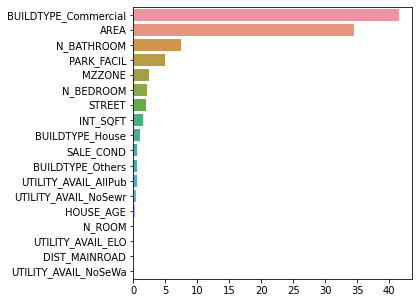

In [133]:
plt.figure(figsize=(5,5))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [134]:
main_features=feature_scores.loc[feature_scores >1]
main_features

BUILDTYPE_Commercial    41.529606
AREA                    34.535374
N_BATHROOM               7.387073
PARK_FACIL               4.969867
MZZONE                   2.389508
N_BEDROOM                2.170264
STREET                   1.981608
INT_SQFT                 1.586608
BUILDTYPE_House          1.107048
dtype: float32

From the above we can observe that these are the features that are impacting on XGBoost Model:

1. BUILDTYPE_Commercial         41.529606
2. AREA                         34.535374
3. N_BATHROOM               7.387073
4. PARK_FACIL               4.969867
5. MZZONE                   2.389508
6. N_BEDROOM                2.170264
7. STREET                   1.981608
8. INT_SQFT                 1.586608
9. BUILDTYPE_House          1.107048

In [135]:
score=[40.700150, 37.157658, 4.126828, 3.865907,3.694559,3.031277,2.770039,1.643945]
features=['BUILDTYPE_Commercial', 'AREA', 'INT_SQFT', 'MZZONE',"STREET","PARK_FACIL","BUILDTYPE_House","N_BEDROOM"]


A PIE plot that showing the feature importances

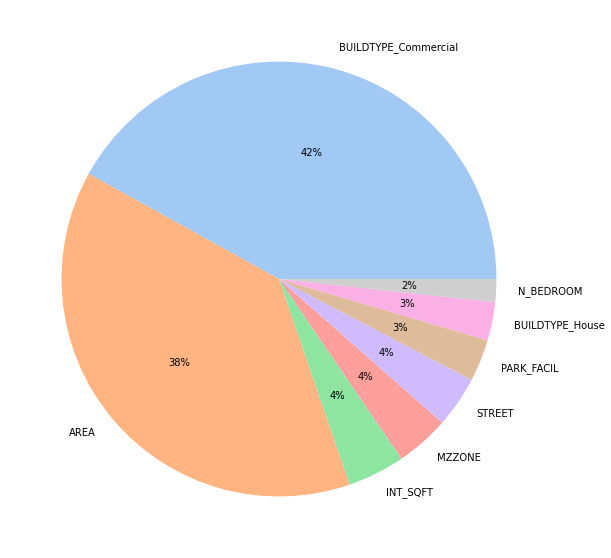

In [136]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')
plt.pie(score, labels=features,colors = colors, autopct = '%0.0f%%')
plt.show()

In [137]:
#pickling the best model
import pickle
with open('xg_model_pkl','wb') as model:
  pickle.dump(xg_model,model)

In [138]:
! pip install streamlit -q

In [139]:
# %%writefile app.py
# import pickle
# import pandas as pd
# import streamlit as st
# from babel.numbers import format_currency
# data=pd.read_csv("final_cleaned_data")
# model = pickle.load(open('xg_model_pkl','rb'))

In [147]:
%%writefile app.py
import pickle
import pandas as pd
import streamlit as st
from babel.numbers import format_currency
#from PIL import Image
data=pd.read_csv("final_cleaned_data1")
model = pickle.load(open('xg_model_pkl','rb'))
def main():
    # Create a page dropdown
    
    st.sidebar.title("Homes")
    col1, col2 = st.columns( [0.5, 0.5])
    with col1:
        st.title("Homes")   
    
    page = st.sidebar.selectbox("Select One", ['ABOUT',"PRICE PREDICTION"])
    if page == "ABOUT":
        st.title('Welcome to Homes')
        st.subheader('Homes is a website where you can look at sales data for Chennai and project the price range of your dream house.')
        st.write('Creator:')
        st.write('**Name:** V Jaswanth Venkata Sai')
        st.write('**Mailid:** jaswanth.vudduru@gmail.com')

    if page == "PRICE PREDICTION":
        st.title('PRICE PREDICTION')
        AREA = st.selectbox("Select an Area ",data.AREA.unique())
        if AREA == 'Chrompet':
            grouped=data[data['AREA']=='Chrompet']
            AREA = 2
        elif AREA == 'Karapakkam':
            grouped=data[data['AREA']=='Karapakkam']
            AREA  = 4
        elif AREA == 'KK Nagar':
            grouped=data[data['AREA']=='KK Nagar']
            AREA = 3
        elif AREA == 'Anna Nagar':
            grouped=data[data['AREA']=='Anna Nagar']
            AREA = 1
        elif AREA == 'Adyar':
            grouped=data[data['AREA']=='Adyar']
            AREA = 0
        elif AREA == 'T Nagar':
            grouped=data[data['AREA']=='T Nagar']
            AREA = 5
        elif AREA == 'Velachery':
            grouped=data[data['AREA']=='Velachery']
            AREA = 6

        INT_SQFT = st.slider("SQFT Required",int(data.INT_SQFT.min()),int(data.INT_SQFT.max()))

        DIST_MAINROAD = st.slider("DIST_MAINROAD",int(data.DIST_MAINROAD.min()),int(data.DIST_MAINROAD.max()))
        
        N_BEDROOM = st.slider("No of Bedrooms",int(data.N_BEDROOM.min()),int(data.N_BEDROOM.max()))

        N_BATHROOM = st.slider("No of Bathrooms",int(data.N_BATHROOM.min()),int(data.N_BATHROOM.max()))

        N_ROOM = st.slider("Total no of rooms",int(data.N_ROOM.min()),int(data.N_ROOM.max()))

        #Coverting SALE_COND categorical to numerical
        SALE_COND = st.selectbox("SALE_COND Preference",data.SALE_COND.unique())
        if SALE_COND == 'Partial':
            SALE_COND = 0
        elif SALE_COND == 'Family':
            SALE_COND = 1
        elif SALE_COND == 'AbNormal':
            SALE_COND = 2
        elif SALE_COND == 'Normal Sale':
            SALE_COND = 3
        else:
            SALE_COND = 4

        PARK_FACIL = st.radio("Parking Area",data.PARK_FACIL.unique())
        if PARK_FACIL == 'Yes':
            PARK_FACIL = 1
        else:
            PARK_FACIL = 0
        
        

        

        
      

        STREET = st.selectbox("Access TO THE Building",data.STREET.unique())

        if STREET == 'Gravel':
            STREET = 0
        elif STREET == 'Paved':
            STREET = 2
        else:
            STREET = 1

        #Coverting MZZONe categorical to numerical
        MZZONE = st.selectbox("Chennai Zone Preference",data.MZZONE.unique())
        if MZZONE == 'A':
            MZZONE = 0
        elif MZZONE == 'RH':
            MZZONE = 3
        elif MZZONE == 'RL':
            MZZONE = 4
        elif MZZONE == 'I':
            MZZONE = 2
        elif MZZONE == 'C':
            MZZONE = 1
        else:
            MZZONE = 5
        

        HOUSE_AGE = st.slider("HOUSE_AGE",int(data.HOUSE_AGE.min()),int(data.HOUSE_AGE.max()))


        BUILDTYPE_Commercial = st.radio("BUILDTYPE_Commercial",data.BUILDTYPE_Commercial.unique())
        if BUILDTYPE_Commercial == 'Yes':
            BUILDTYPE_Commercial = 1
        else:
            BUILDTYPE_Commercial = 0
        
        BUILDTYPE_House = st.radio("BUILDTYPE_House",data.BUILDTYPE_House.unique())
        if BUILDTYPE_House == 'Yes':
            BUILDTYPE_House = 1
        else:
            BUILDTYPE_House = 0
        
        BUILDTYPE_Others = st.radio("BUILDTYPE_Others",data.BUILDTYPE_Others.unique())
        if BUILDTYPE_Others == 'Yes':
            BUILDTYPE_Others = 1
        else:
            BUILDTYPE_Others = 0

        UTILITY_AVAIL_AllPub = st.radio("UTILITY_AVAIL_AllPub",data.UTILITY_AVAIL_AllPub.unique())
        if UTILITY_AVAIL_AllPub == 'Yes':
            UTILITY_AVAIL_AllPub = 1
        else:
            UTILITY_AVAIL_AllPub = 0
        
        UTILITY_AVAIL_ELO = st.radio("UTILITY_AVAIL_ELO",data.UTILITY_AVAIL_ELO.unique())
        if UTILITY_AVAIL_ELO == 'Yes':
            UTILITY_AVAIL_ELO = 1
        else:
            UTILITY_AVAIL_ELO = 0
        
        UTILITY_AVAIL_NoSeWa = st.radio("UTILITY_AVAIL_NoSeWa",data.UTILITY_AVAIL_NoSeWa.unique())
        if UTILITY_AVAIL_NoSeWa == 'Yes':
            UTILITY_AVAIL_NoSeWa = 1
        else:
            UTILITY_AVAIL_NoSeWa = 0
        
        UTILITY_AVAIL_NoSewr = st.radio("UTILITY_AVAIL_NoSewr",data.UTILITY_AVAIL_NoSewr.unique())
        if UTILITY_AVAIL_NoSewr == 'Yes':
            UTILITY_AVAIL_NoSewr = 1
        else:
            UTILITY_AVAIL_NoSewr = 0

        input = pd.DataFrame([[AREA, INT_SQFT, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, STREET, MZZONE, HOUSE_AGE, BUILDTYPE_Commercial, BUILDTYPE_House, BUILDTYPE_Others, UTILITY_AVAIL_AllPub, UTILITY_AVAIL_ELO, UTILITY_AVAIL_NoSeWa, UTILITY_AVAIL_NoSewr]],columns=['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'STREET', 'MZZONE', 'HOUSE_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr'],index=['index'])
                            
                            
        #st.dataframe(input)

        valu = model.predict(input)
        low=int(valu-(valu*0.02))
        low = format_currency(low, 'INR', locale='en_IN')


        high=int(valu+(valu*0.02))
        high = format_currency(high, 'INR', locale='en_IN')

        #print('Estimated value is:',low , 'to', high)


        if st.button(" Get Price",help="Click to predict the price"):
            st.markdown("<h1 style='text-align: center; color: Green;'>Predicted House Price Range</h1>", unsafe_allow_html=True)
            st.write(" ",  low , 'to', high   ," ")
            st.snow()

if __name__=='__main__':
    main()###

Overwriting app.py


In [146]:
!streamlit run app.py & npx localtunnel --port 8501

2022-07-22 12:19:40.777 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.74.127.95:8501

npx: installed 22 in 3.138s
your url is: https://quick-humans-care-34-74-127-95.loca.lt
[12:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:44] WARNING: /workspace/src/objective/regression_obj.

You can check the pricing range of your house as per your requirements on clicking the above website link